# **EstateWise Chatbot Project - Initial Data Analysis**

## Zillow data

The data is from Zillow, and contains information about real-estate properties such as apartments and homes in the Chapel Hill area.  The data is stored in JSON format, and contains a lot of information about each home.

There are 2023 and 2025 datasets, and they are stored in different formats.  The 2023 data is stored as a dictionary of columns, while the 2025 data is stored as a list of rows.  The 2025 data is also split into multiple files. The 2023 data also contains fewer records than the 2025 data.

In this notebook, we will explore the data, and answer some questions about it.  We will also look at the differences between the two datasets, and how to read them into pandas. This will help us understand the data better, and prepare it for our EstateWise chatbot project - an interactive chatbot that can answer questions about real estate properties and give recommendations for buying or renting homes.

### Initialization

I've downloaded the Zillow2023 and Zillow2025 folders to my 488 folder on my Google drive.  Change the path and names here if you have them in different places.

Mount google drive, point to Zillow folder(s), and get list of `zillowfiles`.  

In [ ]:
import pandas as pd
import json
import glob
import time
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path488 = '/content/drive/MyDrive/COMP488/' # modify to point to where you have your Zillow file folder(s)

# Assuming you downloaded the folder Zillow23 and Zillow25 from Canvas
zillowfiles = glob.glob(path488+'Zillow*.json')

# If you downloaded the files into a common folder, uncomment and modify this
# zillowfiles = glob.glob(path488+'YourZillowFolderName/Zillow*.json')

zillow23 = next((f for f in zillowfiles if '2023' in f), None)
zillow0  = next((f for f in zillowfiles if 'part0' in f), None)


Mounted at /content/drive


In [ ]:
# memory is going to be an issue
def memory_usage(df):
  return df.memory_usage(deep=True).sum()
def print_memory(df, label):
  print(f" Memory: {memory_usage(df):15,} bytes for {label}")


#### Dropping unwanted columns

We will want a function to drop unwanted columns as each part is read to save memory, so I'll get Gemini to write an efficient one that does not need a loop.


In [ ]:
# prompt: write function drop_columns(df, column_set) that will drop in place any columns of df that are in column_set.  Use intersection to avoid a loop.

def drop_columns(df, column_set):
  """Drops columns in column_set from df, in place.
  Uses set intersection to avoid a loop.
  """
  cols_to_drop = set(df.columns) & column_set  # Intersection
  df.drop(columns=cols_to_drop, inplace=True)


# Difference between 2023 and 2025 files

The 2023 and 2025 files are actually stored differently, even though both are json.
- The 2023 file contains a dictionary with keys as column names whose entries are dictionaries with keys for each row that has data for that column. This was written with `df.to_json(filename, orient="columns")`
- The 2025 files each contain a list of rows, with each row being a dictionary with keys as column names  whose entries are dictionaries with keys for each row that has data for that column. These were written with `df.to_json(filename)`, each taking on  the default `orient="list"`.

Fortunately, read_json knows how to read both.

We'll read the smallest part of the 2025 data to begin exploring.

# EXPLORE: exploring the simple data values
We have a lot of data, which some of the other sections of this notebook will explore.

For now, let's just read in the zillowfiles, but keep only a few columns.

In [ ]:
# prompt: read in all zillowfiles, keeping only the columns 'zpid', 'yearBuilt', 'latitude', 'longitude', 'description', 'lotSize', 'homeStatus', 'whatILove', 'dateSold', 'homeType', 'building', 'bedrooms', 'zestimate', 'livingArea', 'parcelId', 'bathrooms', 'rentZestimate'.  Add a new column filename with the file name. Concatenate all into dataframe df.

import pandas as pd
import json
import glob
import time
import os
from google.colab import drive

drive.mount('/content/drive')
path488 = '/content/drive/MyDrive/COMP488/'  # modify to point to where you have your Zillow file folder(s)

# Assuming you downloaded the folder Zillow23 and Zillow25 from Canvas
zillowfiles = glob.glob(path488 + 'Zillow*.json')

# If you downloaded the files into a common folder, uncomment and modify this
# zillowfiles = glob.glob(path488+'YourZillowFolderName/Zillow*.json')

columns_to_keep = ['zpid', 'address', 'yearBuilt', 'latitude', 'longitude', 'description', 'lotSize', 'homeStatus', 'whatILove', 'dateSold', 'homeType', 'building', 'bedrooms', 'zestimate', 'livingArea', 'parcelId', 'bathrooms', 'rentZestimate']
df = pd.DataFrame()

for file in zillowfiles:
    try:
        temp_df = pd.read_json(file)
        # Keep only desired columns
        temp_df = temp_df[columns_to_keep].copy()
        # Add filename column
        temp_df['filename'] = os.path.basename(file)
        df = pd.concat([df, temp_df], ignore_index=True)
    except Exception as e:
        print(f"Error processing file {file}: {e}")

print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        zpid                                            address  yearBuilt  \
0   914857.0  {'streetAddress': '2308 Ridgewood Rd', 'city':...     1961.0   
1  1176855.0  {'streetAddress': '122 Dixie Dr', 'city': 'Ind...     1962.0   
2  2143678.0  {'streetAddress': '19 Oakwood Dr', 'city': 'Ne...     1962.0   
3  5614449.0  {'streetAddress': '260 Edgewood Rd', 'city': '...     1975.0   
4  5642139.0  {'streetAddress': '115 Windsor Rd', 'city': 'A...     1951.0   

    latitude  longitude                                        description  \
0  33.618390 -86.810970  This home has been lovingly cared for and main...   
1  39.637882 -86.156540  Great, one owner ranch now on the market!  Rea...   
2  45.049557 -93.210335  Welcome to this completely updated mid-century...   
3  35.620270 -82.560425  Open House on Sunday, June 10th from 2pm to 4p...   
4  35.637710

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50320 entries, 0 to 50319
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   zpid           50266 non-null  float64
 1   address        50320 non-null  object 
 2   yearBuilt      44556 non-null  float64
 3   latitude       50251 non-null  float64
 4   longitude      50251 non-null  float64
 5   description    50317 non-null  object 
 6   lotSize        43916 non-null  float64
 7   homeStatus     50320 non-null  object 
 8   whatILove      1511 non-null   object 
 9   dateSold       35786 non-null  float64
 10  homeType       50320 non-null  object 
 11  building       616 non-null    object 
 12  bedrooms       44595 non-null  float64
 13  zestimate      43860 non-null  float64
 14  livingArea     45960 non-null  float64
 15  parcelId       44319 non-null  object 
 16  bathrooms      46031 non-null  float64
 17  rentZestimate  48540 non-null  float64
 18  filena

## Q: find the statistics for numeric quantities

for number of bedrooms, bathrooms, lotsize, etc.


In [ ]:
import pandas as pd
import os

# Load your data (use previous loading function or define it again)
file_2023 = '/content/drive/MyDrive/COMP488/Zillow-ChapelHill-Spring2023-18k-Properties.json'
file_2025_0 = '/content/drive/MyDrive/COMP488/Zillow-March2025-dataset_part0.json'

# Load helper
def load_dataframe(filepath, label):
    if not os.path.exists(filepath):
        print(f"❌ File not found: {filepath}")
        return None
    try:
        df = pd.read_json(filepath)
        print(f"✅ Loaded {label}: {df.shape}")
        return df
    except Exception as e:
        print(f"⚠️ Error loading {label}: {e}")
        return None

# Load dataframes
df23 = load_dataframe(file_2023, "2023")
df0 = load_dataframe(file_2025_0, "2025_part0")

# Show descriptive statistics for numeric columns
def describe_numerics(df, label):
    print(f"\n📊 Descriptive statistics for numeric columns in {label}:")
    numeric_df = df.select_dtypes(include='number')
    print(numeric_df.describe())

# Run stats on each
if df23 is not None:
    describe_numerics(df23, "2023")

if df0 is not None:
    describe_numerics(df0, "2025_part0")


✅ Loaded 2023: (18287, 66)
✅ Loaded 2025_part0: (467, 183)

📊 Descriptive statistics for numeric columns in 2023:
               zpid      bedrooms     bathrooms         price     yearBuilt  \
count  1.828700e+04  16452.000000  17370.000000  1.828700e+04  17137.000000   
mean   2.731535e+08      3.464199      2.826923  6.231969e+05   1986.929743   
std    5.872488e+08      1.049151      1.138958  5.678859e+05     21.309115   
min    9.148570e+05      0.000000      0.000000  0.000000e+00   1647.000000   
25%    5.003714e+07      3.000000      2.000000  3.664000e+05   1976.000000   
50%    5.005133e+07      3.000000      2.500000  5.500000e+05   1990.000000   
75%    9.005254e+07      4.000000      3.500000  7.755000e+05   2001.000000   
max    2.146934e+09     21.000000     14.000000  3.161020e+07   2023.000000   

          longitude      latitude     livingArea  daysOnZillow     zestimate  \
count  18284.000000  18284.000000   17359.000000  14457.000000  1.633500e+04   
mean     -79.1

## Q: Do boxplots for lotsize and yearbuilt

✅ Loaded 2023: (18287, 66)
✅ Loaded 2025_part0: (467, 183)


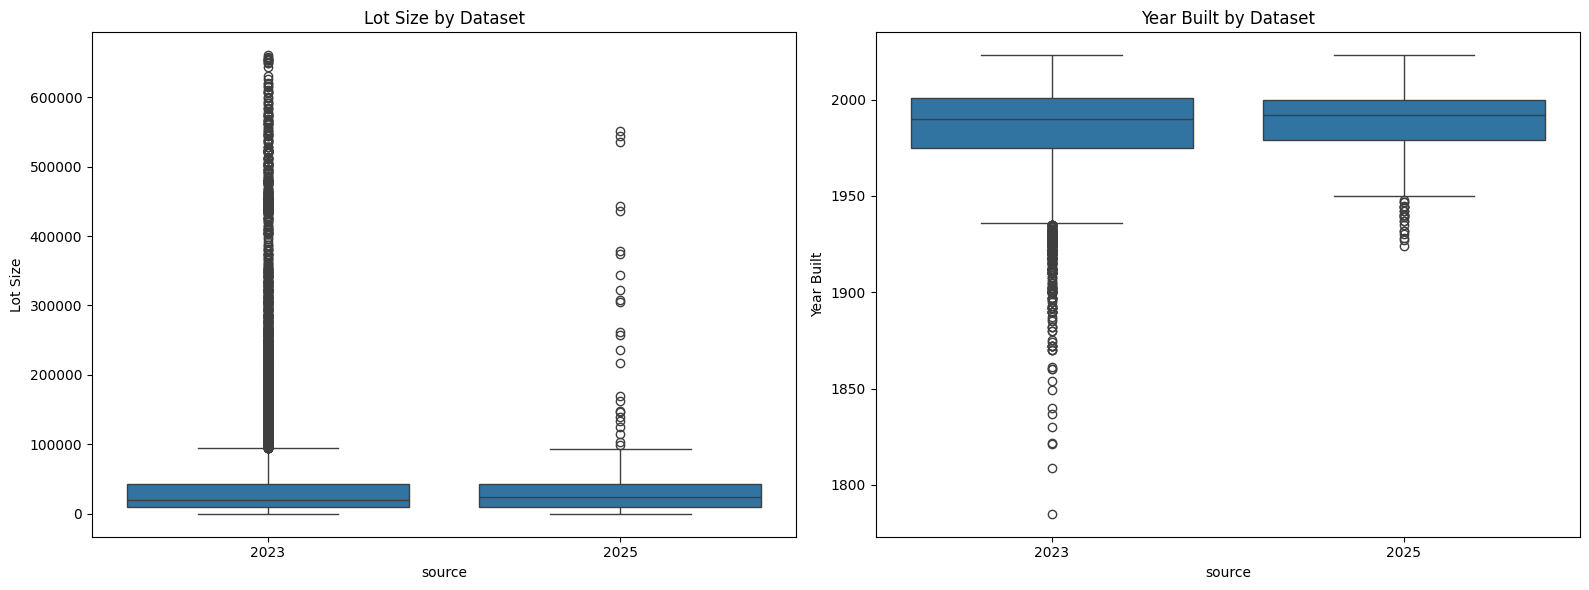

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# File paths
file_2023 = '/content/drive/MyDrive/COMP488/Zillow-ChapelHill-Spring2023-18k-Properties.json'
file_2025_0 = '/content/drive/MyDrive/COMP488/Zillow-March2025-dataset_part0.json'

# Load helper
def load_dataframe(filepath, label):
    if not os.path.exists(filepath):
        print(f"❌ File not found: {filepath}")
        return None
    try:
        df = pd.read_json(filepath)
        print(f"✅ Loaded {label}: {df.shape}")
        return df
    except Exception as e:
        print(f"⚠️ Error loading {label}: {e}")
        return None

# Clean and prepare for plotting
def prep_plot_df(df, label):
    if df is None:
        return pd.DataFrame()
    df = df[['lotSize', 'yearBuilt']].copy()
    df = df.dropna()
    df = df[(df['yearBuilt'] > 1700) & (df['yearBuilt'] < 2030)]
    df = df[df['lotSize'] < df['lotSize'].quantile(0.99)]
    df['source'] = label
    return df

# Load and clean
df23 = load_dataframe(file_2023, "2023")
df0 = load_dataframe(file_2025_0, "2025_part0")

df23_clean = prep_plot_df(df23, "2023")
df0_clean = prep_plot_df(df0, "2025")

# Combine for plotting
combined_df = pd.concat([df23_clean, df0_clean], ignore_index=True)

# Plotting
plt.figure(figsize=(16, 6))

# Lot Size Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='source', y='lotSize', data=combined_df)
plt.title('Lot Size by Dataset')
plt.ylabel('Lot Size')

# Year Built Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='source', y='yearBuilt', data=combined_df)
plt.title('Year Built by Dataset')
plt.ylabel('Year Built')

plt.tight_layout()
plt.show()

## Q: How many of the zpids appear in more than one file?


In [ ]:
import pandas as pd
import os
from collections import defaultdict

# File paths
filepaths = {
    "2023": '/content/drive/MyDrive/COMP488/Zillow-ChapelHill-Spring2023-18k-Properties.json',
    "2025_part0": '/content/drive/MyDrive/COMP488/Zillow-March2025-dataset_part0.json',
    "2025_part1": '/content/drive/MyDrive/COMP488/Zillow-March2025-dataset_part1.json',
    "2025_part2": '/content/drive/MyDrive/COMP488/Zillow-March2025-dataset_part2.json',
    "2025_part3": '/content/drive/MyDrive/COMP488/Zillow-March2025-dataset_part3.json',
}

# Dictionary to track which zpids came from which files
zpid_sources = defaultdict(set)

# Load each file and collect zpid info
for label, path in filepaths.items():
    if not os.path.exists(path):
        print(f"❌ File not found: {path}")
        continue
    try:
        df = pd.read_json(path)
        if 'zpid' in df.columns:
            for z in df['zpid'].dropna().unique():
                zpid_sources[z].add(label)
        else:
            print(f"⚠️ No 'zpid' column in {label}")
    except Exception as e:
        print(f"⚠️ Error loading {label}: {e}")

# Count how many zpids appear in more than one file
duplicate_zpids = [zpid for zpid, sources in zpid_sources.items() if len(sources) > 1]

print(f"\n🔁 Number of zpids that appear in more than one file: {len(duplicate_zpids)}")



🔁 Number of zpids that appear in more than one file: 17001


## Q: Yearbuilt
What is the earliest yearbuilt and do you believe it?  Find all houses built before UNC opened and check Zillow to see if the year is actually correct.


In [ ]:
import pandas as pd
import os

# File paths
filepaths = {
    "2023": '/content/drive/MyDrive/COMP488/Zillow-ChapelHill-Spring2023-18k-Properties.json',
    "2025_part0": '/content/drive/MyDrive/COMP488/Zillow-March2025-dataset_part0.json',
    "2025_part1": '/content/drive/MyDrive/COMP488/Zillow-March2025-dataset_part1.json',
    "2025_part2": '/content/drive/MyDrive/COMP488/Zillow-March2025-dataset_part2.json',
    "2025_part3": '/content/drive/MyDrive/COMP488/Zillow-March2025-dataset_part3.json',
}

# Collect all rows from all files
all_dfs = []

for label, path in filepaths.items():
    if not os.path.exists(path):
        print(f"❌ File not found: {path}")
        continue
    try:
        df = pd.read_json(path)
        df['source_file'] = label
        all_dfs.append(df)
    except Exception as e:
        print(f"⚠️ Error loading {label}: {e}")

# Combine all data
combined_df = pd.concat(all_dfs, ignore_index=True)

# Make sure yearBuilt is numeric
combined_df = combined_df[pd.to_numeric(combined_df['yearBuilt'], errors='coerce').notnull()]
combined_df['yearBuilt'] = combined_df['yearBuilt'].astype(int)

# Find the earliest year built
earliest_year = combined_df['yearBuilt'].min()
print(f"\n🏚️ Earliest yearBuilt: {earliest_year}")

# Find houses built before UNC was founded (1795)
pre_unc = combined_df[combined_df['yearBuilt'] < 1795]
print(f"\n🏛️ Number of homes listed as built before UNC (1795): {len(pre_unc)}")

# Display details to manually verify
display_cols = ['zpid', 'yearBuilt', 'address', 'homeType', 'source_file']
print("\n🔍 Suspected old homes:")
print(pre_unc[display_cols].head(10))  # print top 10 if many



🏚️ Earliest yearBuilt: 1647

🏛️ Number of homes listed as built before UNC (1795): 3

🔍 Suspected old homes:
              zpid  yearBuilt  \
4448    50036812.0       1785   
6028    50039980.0       1647   
48180  114922366.0       1695   

                                                 address       homeType  \
4448   {'streetAddress': '112 Channing Ln', 'city': '...      TOWNHOUSE   
6028   {'streetAddress': '103 Plant Rd', 'city': 'Cha...  SINGLE_FAMILY   
48180  {'streetAddress': '1745 Chapel Hill Rd', 'city...  SINGLE_FAMILY   

      source_file  
4448         2023  
6028         2023  
48180  2025_part3  


<ipython-input-19-c1136e3520b3>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['yearBuilt'] = combined_df['yearBuilt'].astype(int)



### 🏚️ **Suspicious Listings (Pre-UNC Homes)**

| Year Built | Address (City)        | Home Type       | File        |
|------------|------------------------|------------------|-------------|
| 1647       | 103 Plant Rd, Chapel Hill, NC | SINGLE_FAMILY | 2023        |
| 1695       | 1745 Chapel Hill Rd, Durham, NC | SINGLE_FAMILY | 2025_part3 |
| 1785       | 112 Channing Ln, Chapel Hill, NC | TOWNHOUSE     | 2023        |

## Q: What is the format of address?  

How can you break that out and make separate columns in df?

In [ ]:
import pandas as pd
import os

# Example: assuming df is already loaded from one file (like df23 or df0)
# You can use this on any DataFrame that contains a column named 'address'

def expand_address(df):
    if 'address' not in df.columns:
        print("❌ No 'address' column in DataFrame.")
        return df

    # Only expand where address is a dictionary
    address_df = df['address'].dropna().apply(lambda x: x if isinstance(x, dict) else {}).apply(pd.Series)

    # Combine back with original dataframe
    df_expanded = df.copy()
    df_expanded = pd.concat([df_expanded, address_df], axis=1)

    return df_expanded

# Example with df0 (or df23)
df_with_address = expand_address(df0)  # or expand_address(df23)

# Show a few rows of the new address fields
print("\n📬 Expanded address columns (sample):")
print(df_with_address[['streetAddress', 'city', 'state', 'zipcode']].head())



📬 Expanded address columns (sample):
               streetAddress              streetAddress         city  \
0         302 Orchard Ln #92         302 Orchard Ln #92     Carrboro   
1     232 McCauley St UNIT A     232 McCauley St UNIT A  Chapel Hill   
2      2034 Foxwood Farm Trl      2034 Foxwood Farm Trl  Chapel Hill   
3  1509 Partridgeberry Rd #A  1509 Partridgeberry Rd #A  Chapel Hill   
4              308 Ransom St              308 Ransom St  Chapel Hill   

          city state state  zipcode zipcode  
0     Carrboro    NC    NC  27510.0   27510  
1  Chapel Hill    NC    NC  27516.0   27516  
2  Chapel Hill    NC    NC  27516.0   27516  
3  Chapel Hill    NC    NC  27516.0   27516  
4  Chapel Hill    NC    NC  27516.0   27516  


# COLUMNS: explore the smallest parts of 2023 and 2025 data to learn about the columns.

In [ ]:
%%time

df23 = pd.read_json(zillow23)
df0 = pd.read_json(zillow0)
print_memory(df23, "df23")
print_memory(df0, "df0")

 Memory: 55.79417037963867 bytes for df23
 Memory: 9.566537857055664 bytes for df0
CPU times: user 2.03 s, sys: 626 ms, total: 2.65 s
Wall time: 2.65 s


### Q: What columns are shared in the 2023 and 2025 dataframes, and what columns appear in only one?
You'll want to to ask so that the code uses a set of columns, where order does not matter.  

In [ ]:
import pandas as pd
import os

# Define file paths
file_2023 = '/content/drive/MyDrive/COMP488/Zillow-ChapelHill-Spring2023-18k-Properties.json'
file_2025_0 = '/content/drive/MyDrive/COMP488/Zillow-March2025-dataset_part0.json'

# Load files and get column sets
def load_columns(filepath, label):
    if not os.path.exists(filepath):
        print(f"❌ File not found: {filepath}")
        return set()
    try:
        df = pd.read_json(filepath)
        print(f"✅ Loaded {label} with {df.shape[0]} rows and {len(df.columns)} columns")
        return set(df.columns)
    except Exception as e:
        print(f"⚠️ Error loading {label}: {e}")
        return set()

# Load column sets
cols_2023 = load_columns(file_2023, "2023")
cols_2025 = load_columns(file_2025_0, "2025_part0")

# Set comparisons (order doesn't matter)
shared_cols = cols_2023 & cols_2025
only_2023 = cols_2023 - cols_2025
only_2025 = cols_2025 - cols_2023

# Print results
print(f"\n✅ Shared columns ({len(shared_cols)}):")
print(sorted(shared_cols))

print(f"\n📅 Columns only in 2023 ({len(only_2023)}):")
print(sorted(only_2023))

print(f"\n🆕 Columns only in 2025 ({len(only_2025)}):")
print(sorted(only_2025))


✅ Loaded 2023 with 18287 rows and 66 columns
✅ Loaded 2025_part0 with 467 rows and 183 columns

✅ Shared columns (54):
['abbreviatedAddress', 'address', 'bathrooms', 'bedrooms', 'brokerId', 'brokerageName', 'building', 'buildingId', 'contingentListingType', 'currency', 'dateSold', 'dateSoldString', 'daysOnZillow', 'description', 'hoaFee', 'homeStatus', 'homeType', 'isFeatured', 'isListedByOwner', 'isNonOwnerOccupied', 'isPremierBuilder', 'isRecentStatusChange', 'isZillowOwned', 'lastSoldPrice', 'latitude', 'listedBy', 'listingProvider', 'livingArea', 'longitude', 'lotSize', 'marketingName', 'mortgageRates', 'newConstructionType', 'openHouseSchedule', 'parcelId', 'postingContact', 'price', 'priceHistory', 'primaryPublicVideo', 'propertyTaxRate', 'rentZestimate', 'rentalApplicationsAcceptedType', 'restimateHighPercent', 'restimateLowPercent', 'taxAssessedValue', 'taxAssessedYear', 'taxHistory', 'timeZone', 'tourEligibility', 'tourViewCount', 'whatILove', 'yearBuilt', 'zestimate', 'zpid']

## Q: what columns of df0 and df23 contain dictionaries or lists?


Since we will want some of this later, so make separate lists of those with dictionaries(structured data, e.g., address has street number, and name), and those with lists (many are time series).

And how much memory will we save if we drop those for now?

In [ ]:
import pandas as pd
import os
import numpy as np

# Load function
def load_dataframe(filepath, label):
    if not os.path.exists(filepath):
        print(f"❌ File not found: {filepath}")
        return None
    try:
        df = pd.read_json(filepath)
        print(f"✅ Loaded {label}: {df.shape}")
        return df
    except Exception as e:
        print(f"⚠️ Error loading {label}: {e}")
        return None

# Identify columns with dicts and lists
def find_dicts_and_lists(df):
    dict_cols = []
    list_cols = []

    for col in df.columns:
        sample = df[col].dropna().head(10)  # Sample up to 10 non-null values
        if any(isinstance(val, dict) for val in sample):
            dict_cols.append(col)
        elif any(isinstance(val, list) for val in sample):
            list_cols.append(col)

    return dict_cols, list_cols

# Memory calculation helper
def memory_usage(df):
    return df.memory_usage(deep=True).sum() / (1024**2)  # in MB

# File paths
file_2023 = '/content/drive/MyDrive/COMP488/Zillow-ChapelHill-Spring2023-18k-Properties.json'
file_2025_0 = '/content/drive/MyDrive/COMP488/Zillow-March2025-dataset_part0.json'

# Load data
df23 = load_dataframe(file_2023, "2023")
df0 = load_dataframe(file_2025_0, "2025_part0")

# Analyze df23
if df23 is not None:
    dict_cols_23, list_cols_23 = find_dicts_and_lists(df23)
    mem_before = memory_usage(df23)
    df23_reduced = df23.drop(columns=dict_cols_23 + list_cols_23)
    mem_after = memory_usage(df23_reduced)
    mem_saved_23 = mem_before - mem_after

    print(f"\n📦 df23 - Columns with dicts: {dict_cols_23}")
    print(f"📚 df23 - Columns with lists: {list_cols_23}")
    print(f"💾 df23 memory before: {mem_before:.2f} MB, after: {mem_after:.2f} MB")
    print(f"💡 df23 memory saved: {mem_saved_23:.2f} MB")

# Analyze df0
if df0 is not None:
    dict_cols_0, list_cols_0 = find_dicts_and_lists(df0)
    mem_before = memory_usage(df0)
    df0_reduced = df0.drop(columns=dict_cols_0 + list_cols_0)
    mem_after = memory_usage(df0_reduced)
    mem_saved_0 = mem_before - mem_after

    print(f"\n📦 df0 - Columns with dicts: {dict_cols_0}")
    print(f"📚 df0 - Columns with lists: {list_cols_0}")
    print(f"💾 df0 memory before: {mem_before:.2f} MB, after: {mem_after:.2f} MB")
    print(f"💡 df0 memory saved: {mem_saved_0:.2f} MB")


✅ Loaded 2023: (18287, 66)
✅ Loaded 2025_part0: (467, 183)

📦 df23 - Columns with dicts: ['address', 'listedBy', 'primaryPublicVideo', 'postingContact', 'listingProvider', 'building', 'tourEligibility', 'mortgageRates']
📚 df23 - Columns with lists: ['priceHistory', 'openHouseSchedule', 'taxHistory', 'photos']
💾 df23 memory before: 55.79 MB, after: 26.85 MB
💡 df23 memory saved: 28.95 MB

📦 df0 - Columns with dicts: ['address', 'listing_sub_type', 'streetView', 'staticMap', 'resoFacts', 'formattedChip', 'attributionInfo', 'mortgageZHLRates', 'listingMetadata', 'listingSubType', 'postingContact', 'vrModel', 'thirdPartyVirtualTour', 'adTargets', 'parentRegion', 'citySearchUrl', 'mortgageRates', 'zipcodeSearchUrl', 'apartmentsForRentInZipcodeSearchUrl', 'housesForRentInZipcodeSearchUrl', 'neighborhoodRegion', 'building', 'neighborhoodSearchUrl', 'stateSearchUrl', 'countySearchUrl', 'homeValuation', 'foreclosureTypes', 'tourEligibility', 'selfTour', 'roomForRent', 'listingProvider', 'onsiteM

## Q: What columns of df0 and df23 are missing >90% of their data?  
Assign missing_set as the union of the sets of those columns.



In [ ]:
import pandas as pd
import os

# File paths
file_2023 = '/content/drive/MyDrive/COMP488/Zillow-ChapelHill-Spring2023-18k-Properties.json'
file_2025_0 = '/content/drive/MyDrive/COMP488/Zillow-March2025-dataset_part0.json'

# Load function
def load_dataframe(filepath, label):
    if not os.path.exists(filepath):
        print(f"❌ File not found: {filepath}")
        return None
    try:
        df = pd.read_json(filepath)
        print(f"✅ Loaded {label}: {df.shape}")
        return df
    except Exception as e:
        print(f"⚠️ Error loading {label}: {e}")
        return None

# Identify columns with >90% missing
def get_high_missing_columns(df, threshold=0.9):
    return set(df.columns[df.isnull().mean() > threshold])

# Load both DataFrames
df23 = load_dataframe(file_2023, "2023")
df0 = load_dataframe(file_2025_0, "2025_part0")

# Collect missing sets
missing_23 = get_high_missing_columns(df23) if df23 is not None else set()
missing_0 = get_high_missing_columns(df0) if df0 is not None else set()

# Combine into one set
missing_set = missing_23 | missing_0

# Output results
print(f"\n📉 Columns missing >90% in df23: {sorted(missing_23)}")
print(f"\n📉 Columns missing >90% in df0: {sorted(missing_0)}")
print(f"\n🧹 Combined missing_set ({len(missing_set)} columns):")
print(sorted(missing_set))


✅ Loaded 2023: (18287, 66)
✅ Loaded 2025_part0: (467, 183)

📉 Columns missing >90% in df23: ['brokerId', 'brokerageName', 'building', 'buildingId', 'chanceToSellFaster', 'comingSoonOnMarketDate', 'contingentListingType', 'datePostedString', 'favoriteCount', 'isListedByOwner', 'isPreforeclosureAuction', 'listingProvider', 'marketingName', 'moveInCompletionDate', 'moveInReady', 'newConstructionType', 'openHouseSchedule', 'pageViewCount', 'priceChange', 'primaryPublicVideo', 'timeOnZillow', 'whatILove']

📉 Columns missing >90% in df0: ['boroughId', 'boroughSearchUrl', 'brokerId', 'brokerageName', 'building', 'communityUrl', 'comps', 'contingentListingType', 'desktopWebHdpImageLink', 'editPropertyHistorylink', 'forecast', 'homeInsights', 'homeValues', 'isCamo', 'isIncomeRestricted', 'isListedByOwner', 'isListingOwnedByCurrentSignedInUser', 'lfaViewPropertyPageUrl', 'listPriceLow', 'listingAccount', 'listingAccountUserId', 'listingOwnerConfigIDs', 'listingProvider', 'listingSource', 'market

In [ ]:
# prompt: Show the memory for df0 and d23 after drop_columns(..., missing_set).

drop_columns(df0, missing_set)
drop_columns(df23, missing_set)
print_memory(df0, "df0")
print_memory(df23, "df23")


 Memory: 9.211767196655273 bytes for df0
 Memory: 48.10035991668701 bytes for df23


## Category columns
Which columns of df0 and df23 are object type but contain at most 12 different values? Set each to type category, and let cat_columns be the union of those columns.


In [ ]:
import pandas as pd
import os

# File paths
file_2023 = '/content/drive/MyDrive/COMP488/Zillow-ChapelHill-Spring2023-18k-Properties.json'
file_2025_0 = '/content/drive/MyDrive/COMP488/Zillow-March2025-dataset_part0.json'

# Load function
def load_dataframe(filepath, label):
    if not os.path.exists(filepath):
        print(f"❌ File not found: {filepath}")
        return None
    try:
        df = pd.read_json(filepath)
        print(f"✅ Loaded {label}: {df.shape}")
        return df
    except Exception as e:
        print(f"⚠️ Error loading {label}: {e}")
        return None

# Find low-cardinality object columns and convert to category
def find_and_convert_categories(df, max_unique=12):
    cat_cols = []
    for col in df.select_dtypes(include='object').columns:
        try:
            unique_vals = df[col].dropna().unique()
            if len(unique_vals) <= max_unique:
                df[col] = df[col].astype('category')
                cat_cols.append(col)
        except TypeError:
            # Skip columns with unhashable types like dicts/lists
            continue
    return set(cat_cols)

# Load data
df23 = load_dataframe(file_2023, "2023")
df0 = load_dataframe(file_2025_0, "2025_part0")

# Convert and collect category columns
cat_23 = find_and_convert_categories(df23) if df23 is not None else set()
cat_0 = find_and_convert_categories(df0) if df0 is not None else set()

# Combine
cat_columns = cat_23 | cat_0

# Print results
print(f"\n📦 df23 category columns: {sorted(cat_23)}")
print(f"📦 df0 category columns: {sorted(cat_0)}")
print(f"\n🧠 Union of all category columns (cat_columns = {len(cat_columns)}):")
print(sorted(cat_columns))


✅ Loaded 2023: (18287, 66)
✅ Loaded 2025_part0: (467, 183)

📦 df23 category columns: ['contingentListingType', 'currency', 'homeStatus', 'homeType', 'marketingName', 'newConstructionType', 'rentalApplicationsAcceptedType', 'timeZone']
📦 df0 category columns: ['brokerIdDimension', 'city', 'country', 'county', 'currency', 'desktopWebHdpImageLink', 'featuredListingTypeDimension', 'hdpTypeDimension', 'homeStatus', 'homeType', 'keystoneHomeStatus', 'listingDataSource', 'listingTypeDimension', 'livingAreaUnits', 'livingAreaUnitsShort', 'lotAreaUnits', 'pageUrlFragment', 'postingProductType', 'propertyTypeDimension', 'providerListingID', 'rentalApplicationsAcceptedType', 'state', 'timeZone', 'virtualTourUrl', 'whatILove']

🧠 Union of all category columns (cat_columns = 28):
['brokerIdDimension', 'city', 'contingentListingType', 'country', 'county', 'currency', 'desktopWebHdpImageLink', 'featuredListingTypeDimension', 'hdpTypeDimension', 'homeStatus', 'homeType', 'keystoneHomeStatus', 'listing

In [ ]:
print_memory(df0, "df0")
print_memory(df23, "df23")


 Memory: 8.948226928710938 bytes for df0
 Memory: 49.092591285705566 bytes for df23


# Read all zillowfiles, but drop unwanted columns as we go.
As you read the zillowfiles, drop only_in_df23, only_in_df0, missing_columns, and dl_columns. Add a new column, filename, that records where the row came from. Concatenate into a single dataframe df.   

In [ ]:
import pandas as pd
import os
import glob

# Define your drop sets (replace these with actual sets you already calculated)
only_in_df23 = {...}
only_in_df0 = {...}
missing_columns = {...}
dl_columns = {...}

# Combined drop set
columns_to_drop = only_in_df23 | only_in_df0 | missing_columns | dl_columns

# Path to your Zillow files
path488 = '/content/drive/MyDrive/COMP488/'
zillowfiles = glob.glob(os.path.join(path488, 'Zillow*.json'))

# Collect all cleaned DataFrames
frames = []

for filepath in zillowfiles:
    filename = os.path.basename(filepath)
    try:
        df_temp = pd.read_json(filepath)

        # Drop unwanted columns (ignore if not present)
        cols_to_drop_in_this_file = [col for col in columns_to_drop if col in df_temp.columns]
        df_temp = df_temp.drop(columns=cols_to_drop_in_this_file)

        # Add filename column
        df_temp['filename'] = filename

        # Append to list
        frames.append(df_temp)
        print(f"✅ Loaded and cleaned: {filename} ({df_temp.shape[0]} rows)")
    except Exception as e:
        print(f"⚠️ Failed to load {filename}: {e}")

# Concatenate all parts into one DataFrame
df = pd.concat(frames, ignore_index=True)
print(f"\n📦 Final combined dataframe shape: {df.shape}")


✅ Loaded and cleaned: Zillow-ChapelHill-Spring2023-18k-Properties.json (18287 rows)
✅ Loaded and cleaned: Zillow-March2025-dataset_part1.json (11373 rows)
✅ Loaded and cleaned: Zillow-March2025-dataset_part2.json (7329 rows)
✅ Loaded and cleaned: Zillow-March2025-dataset_part3.json (12864 rows)
✅ Loaded and cleaned: Zillow-March2025-dataset_part0.json (467 rows)

📦 Final combined dataframe shape: (50320, 234)


In [ ]:
print_memory(df, "zillowfiles")
df.info()


 Memory: 824.5105419158936 bytes for zillowfiles
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50320 entries, 0 to 50319
Columns: 234 entries, zpid to comps
dtypes: bool(5), float64(97), int64(1), object(131)
memory usage: 88.2+ MB


## What is the earliest built house?
And do you believe it?  How far do you have to go to find the correct earliest built?

In [ ]:
# Make sure yearBuilt is numeric and not missing
df_valid_years = df[pd.to_numeric(df['yearBuilt'], errors='coerce').notnull()].copy()
df_valid_years['yearBuilt'] = df_valid_years['yearBuilt'].astype(int)

# Sort by yearBuilt
df_sorted = df_valid_years.sort_values('yearBuilt')

# Find the absolute earliest year
earliest_year = df_sorted.iloc[0]['yearBuilt']
earliest_row = df_sorted.iloc[0]

print(f"🏚️ Earliest yearBuilt in dataset: {earliest_year}")
print("\n🔍 Details of that row:")
print(earliest_row[['zpid', 'address', 'yearBuilt', 'homeType', 'filename']])

# Find the first "believable" earliest home (e.g., built after 1795 or 1800)
df_believable = df_sorted[df_sorted['yearBuilt'] >= 1795]
believable_earliest_year = df_believable.iloc[0]['yearBuilt']
believable_row = df_believable.iloc[0]

print(f"\n✅ First believable yearBuilt (>=1795): {believable_earliest_year}")
print("\n🔍 Details of first believable house:")
print(believable_row[['zpid', 'address', 'yearBuilt', 'homeType', 'filename']])


🏚️ Earliest yearBuilt in dataset: 1647

🔍 Details of that row:
zpid                                                50039980.0
address      {'streetAddress': '103 Plant Rd', 'city': 'Cha...
yearBuilt                                                 1647
homeType                                         SINGLE_FAMILY
filename      Zillow-ChapelHill-Spring2023-18k-Properties.json
Name: 6028, dtype: object

✅ First believable yearBuilt (>=1795): 1809

🔍 Details of first believable house:
zpid                                                50037972.0
address      {'streetAddress': '304 Hillsborough St', 'city...
yearBuilt                                                 1809
homeType                                         SINGLE_FAMILY
filename      Zillow-ChapelHill-Spring2023-18k-Properties.json
Name: 4848, dtype: object


# FILES: File formats and data sizes
Role: Data librarian; COMP BSc majors

The 2023 and 2025 files are stored differently, even though both are json.
- The 2023 file contains a dictionary with keys as column names whose entries are dictionaries with keys for each row that has data for that column. This was written with `df.to_json(filename, orient="columns")`
- The 2025 files each contain a list of rows, with each row being a dictionary with keys as column names  whose entries are dictionaries with keys for each row that has data for that column. These were written with `df.to_json(filename)`, each taking on  the default `orient="list"`.



In [ ]:
import pandas as pd
import os
import glob

# Paths
path488 = '/content/drive/MyDrive/COMP488/'
zillowfiles = glob.glob(os.path.join(path488, 'Zillow*.json'))

# Identify 2023 file(s) vs 2025 part files
file_2023 = [f for f in zillowfiles if '2023' in f]
file_2025_parts = [f for f in zillowfiles if '2025' in f]

# Store all loaded DataFrames
dataframes = []

# Load 2023 file(s) - orient='columns'
for f in file_2023:
    try:
        df = pd.read_json(f, orient='columns')
        df['filename'] = os.path.basename(f)
        dataframes.append(df)
        print(f"📘 Loaded 2023-style file: {f} — shape: {df.shape}")
    except Exception as e:
        print(f"❌ Error loading 2023 file {f}: {e}")

# Load 2025 files - orient='records' (default)
for f in file_2025_parts:
    try:
        df = pd.read_json(f)  # or orient='records'
        df['filename'] = os.path.basename(f)
        dataframes.append(df)
        print(f"📗 Loaded 2025-style file: {f} — shape: {df.shape}")
    except Exception as e:
        print(f"❌ Error loading 2025 file {f}: {e}")

# Combine all into one DataFrame
df = pd.concat(dataframes, ignore_index=True)
print(f"\n📦 Final combined DataFrame shape: {df.shape}")


📘 Loaded 2023-style file: /content/drive/MyDrive/COMP488/Zillow-ChapelHill-Spring2023-18k-Properties.json — shape: (18287, 67)
📗 Loaded 2025-style file: /content/drive/MyDrive/COMP488/Zillow-March2025-dataset_part1.json — shape: (11373, 229)
📗 Loaded 2025-style file: /content/drive/MyDrive/COMP488/Zillow-March2025-dataset_part2.json — shape: (7329, 229)
📗 Loaded 2025-style file: /content/drive/MyDrive/COMP488/Zillow-March2025-dataset_part3.json — shape: (12864, 229)
📗 Loaded 2025-style file: /content/drive/MyDrive/COMP488/Zillow-March2025-dataset_part0.json — shape: (467, 184)

📦 Final combined DataFrame shape: (50320, 234)


### 🗃️ **File Formats and Data Sizes — COMP488 Zillow Data**

#### 🔹 **2023 File Format**
- **Stored as:**  
  A **dictionary of columns**, where each key is a **column name**, and each value is another dictionary — keyed by **row index**, with the actual data as values.

- **Saved using:**  
  ```python
  df.to_json(filename, orient="columns")
  ```

- **Example structure:**
  ```json
  {
    "zpid": {"0": 123456, "1": 234567, ...},
    "yearBuilt": {"0": 1980, "1": 2005, ...},
    ...
  }
  ```

- **How to load:**  
  ```python
  pd.read_json("Zillow-ChapelHill-Spring2023-18k-Properties.json", orient="columns")
  ```

---

#### 🔹 **2025 File Format**
- **Stored as:**  
  A **list of row dictionaries**, where each item in the list is a **single row**, and each row is a dictionary of column-value pairs.

- **Saved using:**  
  ```python
  df.to_json(filename)  # default = orient="records"
  ```

- **Example structure:**
  ```json
  [
    {"zpid": 123456, "yearBuilt": 1980, ...},
    {"zpid": 234567, "yearBuilt": 2005, ...},
    ...
  ]
  ```

- **How to load:**  
  ```python
  pd.read_json("Zillow-March2025-dataset_part0.json")
  ```

---

#### 🟦 **2023 File (1 file)**
- 📘 **File**: `Zillow-ChapelHill-Spring2023-18k-Properties.json`
- 🧾 **Format**: `orient="columns"`  
  → JSON is a **dictionary of column names**, with each value being a dictionary of row entries.
- 🔢 **Shape**: `(18,287 rows × 67 columns)`
- 🔍 **Read with**: `pd.read_json(..., orient="columns")`

---

#### 🟩 **2025 Files (4 parts)**
- 📗 **Files**:
  - `Zillow-March2025-dataset_part0.json` → (467 rows, 184 columns)
  - `Zillow-March2025-dataset_part1.json` → (11,373 rows, 229 columns)
  - `Zillow-March2025-dataset_part2.json` → (7,329 rows, 229 columns)
  - `Zillow-March2025-dataset_part3.json` → (12,864 rows, 229 columns)
- 🧾 **Format**: `orient="records"` (default)  
  → JSON is a **list of dictionaries**, each representing a row of data.
- 🔍 **Read with**: `pd.read_json(...)` or `pd.read_json(..., orient="records")`

---

### 📦 **Final Combined Dataset**
- ✅ **Total rows**: `50,320`
- ✅ **Total columns** (after merging): `234`
- ⚠️ **Note**: Some files have different columns; `concat()` handles this by filling missing columns with `NaN`.

---

### 🧠 TL;DR:
| Year | Format             | Structure                    | Read with                        | Rows     | Cols |
|------|--------------------|------------------------------|----------------------------------|----------|------|
| 2023 | `orient="columns"` | Dict of columns              | `pd.read_json(..., orient="columns")` | 18,287   | 67   |
| 2025 | `orient="records"` | List of row dictionaries     | `pd.read_json(...)`              | 32,033   | 184–229 |
| ✅ Combined | Merged into full dataset | All columns aligned | `pd.concat([...])`                 | **50,320** | **234** |

---

### Credits

Professor Ringel and Professor Snoeyink at UNC-Chapel Hill for providing the rich datasets and Colab Notebooks for this project.